## **World Meat Consumption Analysis**

### **Introduction** 
In this notebook we are going to take a dive into the trends of meat consumption worldwide.This being one of my first data science projects, I am eager to to test my abilities and learn along the way.

### **Goals**
There are a few questions we will answer in this notebook:
1. What is the general trend of meat consumption?
2. What countries consume the most meat?
3. Do some countries prefer different types of meat?
4. Are there any peak years in meat consumption? 

Beyond discovering insights within the data I hope to develop my skills in these libraries:
1. Pandas
2. MatPlotLib
3. NumPy

### **Data**
The dataset that we are exploring today is a single CSV from Kaggle.com, published by Vagif Aliyev and is licensed under Open Data Commons for public use.

You can view the meat consumption dataset <a href="https://www.kaggle.com/vagifa/meatconsumption">here
    
The meat consumption data contains the following features:
    <br>
    -  **LOCATION**: *country code*
    <br>
    -  **SUBJECT**: *type of meat*
    <br>
    -  **TIME**: *year*
    <br>
    -  **MEASURE**: *the measure used to show the value*
    <br>
    -  **VALUE**: *value according to the measure*

### **Inspecting our Data**
Before we start cleaning and processing our data, we need to do some further inspection to help us figure out exactly what cleaning needs to be done.

In order to start inspecting and later cleaning our data, I will be utilizing the following Python libraries:
1. Pandas
2. NumPy

In [49]:
import pandas as pd
import numpy as np

In [50]:
#import the csv
meat_df = pd.read_csv("data/meat_consumption_worldwide.csv")

In [51]:
#quick preview of our dataframe
meat_df

,LOCATION,SUBJECT,MEASURE,TIME,Value
0,AUS,BEEF,KG_CAP,1991,27.721815
1,AUS,BEEF,KG_CAP,1992,26.199591
2,AUS,BEEF,KG_CAP,1993,26.169094
3,AUS,BEEF,KG_CAP,1994,25.456134
4,AUS,BEEF,KG_CAP,1995,25.340226
...,...,...,...,...,...
13755,MYS,SHEEP,THND_TONNE,2022,44.154151
13756,MYS,SHEEP,THND_TONNE,2023,44.897588
13757,MYS,SHEEP,THND_TONNE,2024,45.612107
13758,MYS,SHEEP,THND_TONNE,2025,46.325312



This dataset is already pretty clean, however we definitely want to do some further inspection to assure this.



In [52]:
#number of rows
len(meat_df)

13760

In [53]:
#rows and columns
meat_df.shape

(13760, 5)

In [54]:
#checking for nulls
meat_df.isnull().values.any()

False

In [55]:
#number of unique locations
len(pd.unique(meat_df['LOCATION']))

48

So it looks like we have 48 unique countries in this dataset

In [56]:
#unique location values and their count
meat_df["LOCATION"].value_counts()

MYS      296
THA      296
IDN      296
IRN      296
ISR      296
VNM      296
CAN      296
MOZ      296
NGA      296
PAK      296
PRY      296
PER      296
PHL      296
URY      296
SAU      296
ZAF      296
SDN      296
IND      296
HTI      296
GHA      296
DZA      296
JPN      296
SSA      296
MEX      296
NZL      296
TUR      296
USA      296
TZA      296
ZMB      296
BGD      296
BRA      296
CHL      296
COL      296
EGY      296
CHN      294
ARG      294
AUS      292
KOR      292
UKR      288
KAZ      288
ETH      284
RUS      278
BRICS    278
EU28     276
OECD     274
WLD      262
NOR      148
CHE      148
Name: LOCATION, dtype: int64

Some of these location values are groups of countries like EU28 and BRICS. I am really only interested in individual countries today.

In [57]:
#unique measure values and their count
meat_df["MEASURE"].value_counts()

THND_TONNE    7042
KG_CAP        6718
Name: MEASURE, dtype: int64

We have to two types of measures, kilograms per capita, and thousands of tonnes. Both measures can be analyzed in their own way so we should probably separate these into different dataframes.

In [58]:
#unique time values and their counts
meat_df["TIME"].value_counts()

2009    376
2017    376
2011    376
2012    376
2013    376
2014    376
2015    376
2016    376
2018    376
2026    376
2019    376
2020    376
2021    376
2022    376
2023    376
2024    376
2010    376
2008    376
2000    376
2003    376
2007    376
2001    376
2002    376
2025    376
2004    376
2005    376
2006    376
1999    370
1998    370
1997    370
1996    370
1995    370
1994    370
1993    370
1992    360
1991    336
1990    322
Name: TIME, dtype: int64

In [59]:
len(pd.unique(meat_df['TIME']))

37

There is 37 unique years and it is important to point out that this data was last updated in 2018 and contains predictions for future years. 

In [60]:
#unique subject values and their counts
meat_df["SUBJECT"].value_counts()

POULTRY    3457
SHEEP      3457
PIG        3447
BEEF       3399
Name: SUBJECT, dtype: int64

4 types of meat are recorded in this dataset

### **Pre-processing**
Our goal for pre-processing is to make sure all the data is consistent, accurate, uniform, and complete.

Now that we have some basic information about this dataset we can start organizing it to our needs.

First we will clean the main dataset by dropping prediction values and dropping rows of locations that are not individual countries. After that we will create a dataframe for each of the measures.

In [61]:
#get current values only
meat_clean = meat_df.loc[meat_df["TIME"] < 2019]

#drop rows with a location that is not an individual country
not_countries = ["BRICS", "EU28", "OECD", "WLD"] 
meat_clean = meat_clean.drop(meat_clean[meat_clean.LOCATION.isin(not_countries)].index)

#create df for the KG_CAP measure
grouped = meat_clean.groupby(meat_clean.MEASURE)
meat_kgcap = grouped.get_group("KG_CAP")

#create df for the THND_TONNE measure
meat_thndtonnes = grouped.get_group("THND_TONNE")

### **Data Understanding**

Now that our data is cleaned to our needs we can start exploring some of our initial questions through visualizations.

We will use the following libraries for data visualizations
1. MatPlotLib
2. seaborn

In [62]:
import matplotlib as mp
import seaborn as sns
sns.set(rc={"figure.dpi":100, 'savefig.dpi':100})
sns.set_context('notebook')
sns.set_style("ticks")

**What is the general trend of the meat industry?**

[Text(0.5, 0, 'Year'), Text(0, 0.5, 'Thousand Tonnes')]

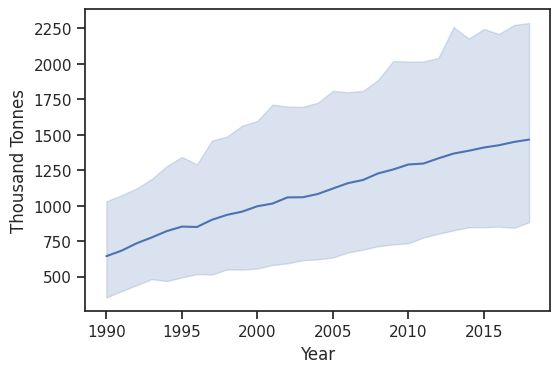

In [63]:
ax = sns.lineplot(data=meat_thndtonnes, x="TIME", y="Value", palette = 'pastel')
ax.set(xlabel='Year', ylabel='Thousand Tonnes')

**What countries consume the most meat?**

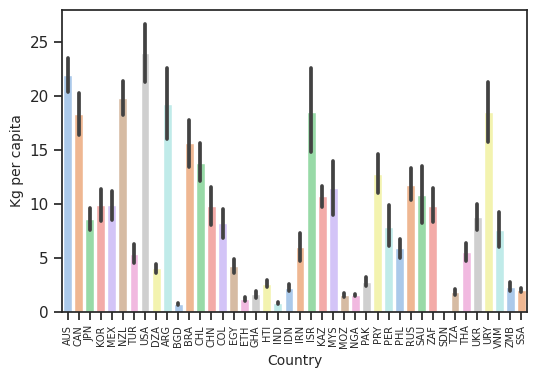

In [64]:
ax = sns.barplot(x="LOCATION", y="Value", data=meat_kgcap, palette = 'pastel')
ax.set_xlabel('Country', fontsize=10)
ax.set_ylabel('Kg per capita', fontsize=10)
ax.tick_params(axis='x', rotation=90, labelsize = 7)

**What countries consume the most of each type of meat?**

In [65]:
#Creating a dictionary of each type of meat

meat_dict = {"BEEF" : meat_kgcap.loc[meat_kgcap["SUBJECT"] == "BEEF"],
            "PIG" : meat_kgcap.loc[meat_kgcap["SUBJECT"] == "PIG"],
            "POULTRY" : meat_kgcap.loc[meat_kgcap["SUBJECT"] == "POULTRY"],
            "SHEEP" : meat_kgcap.loc[meat_kgcap["SUBJECT"] == "SHEEP"]
            }

**What countries consume the most beef?**

Text(0.5, 1.0, 'Beef')

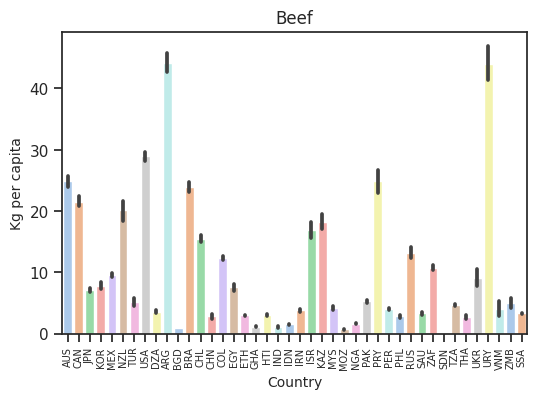

In [66]:
"Beef only"
ax = sns.barplot(x="LOCATION", y="Value", data=meat_dict["BEEF"], palette = 'pastel')
ax.set_xlabel('Country', fontsize=10)
ax.set_ylabel('Kg per capita', fontsize=10)
ax.tick_params(axis='x', rotation=90, labelsize = 7)
ax.set_title("Beef")

**What countries consume the most pork?**

Text(0.5, 1.0, 'Pig')

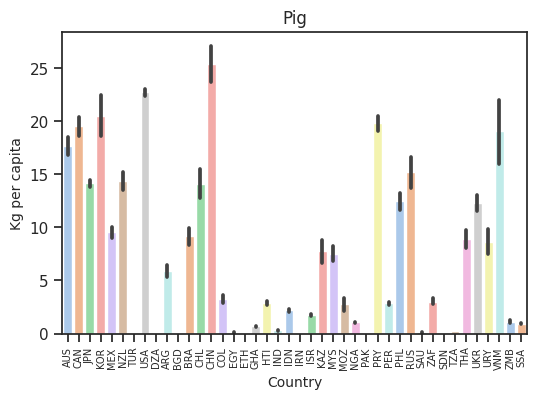

In [67]:
#Pig only
ax = sns.barplot(x="LOCATION", y="Value", data=meat_dict["PIG"], palette = 'pastel')
ax.set_xlabel('Country', fontsize=10)
ax.set_ylabel('Kg per capita', fontsize=10)
ax.tick_params(axis='x', rotation=90, labelsize = 7)
ax.set_title("Pig")

**What countries consume the most poultry?**

Text(0.5, 1.0, 'Poultry')

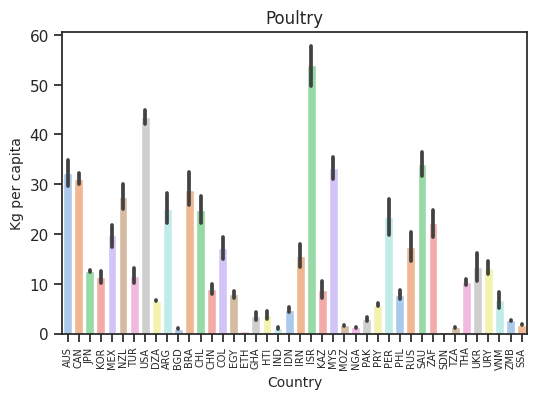

In [68]:
ax = sns.barplot(x="LOCATION", y="Value", data=meat_dict["POULTRY"], palette = 'pastel')
ax.set_xlabel('Country', fontsize=10)
ax.set_ylabel('Kg per capita', fontsize=10)
ax.tick_params(axis='x', rotation=90, labelsize = 7)
ax.set_title("Poultry")

**What countries consume the most sheep?**

Text(0.5, 1.0, 'Sheep')

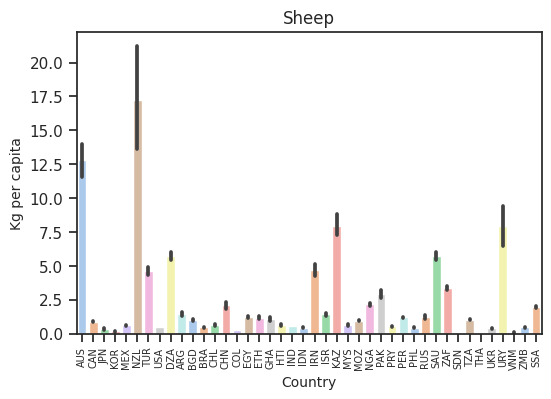

In [69]:
ax = sns.barplot(x="LOCATION", y="Value", data=meat_dict["SHEEP"], palette = 'pastel')
ax.set_xlabel('Country', fontsize=10)
ax.set_ylabel('Kg per capita', fontsize=10)
ax.tick_params(axis='x', rotation=90, labelsize = 7)
ax.set_title("Sheep")

**What was the percent growth in consumption each year?**

In [76]:
#calculate percent change each year worldwide
meat_year = meat_thndtonnes
meat_year.drop(columns = ['LOCATION', 'SUBJECT', 'MEASURE'])
meat_year_sums = meat_year.groupby(['TIME']).sum()
meat_year_pct = meat_year_sums.pct_change()
meat_year_pct

,Value
TIME,
1990,NaN
1991,0.098133
1992,0.094782
1993,0.061960
1994,0.057796
1995,0.038762
1996,-0.003189
1997,0.060184
1998,0.038078


[Text(0.5, 0, 'Year'), Text(0, 0.5, 'Percent Change in Consumption')]

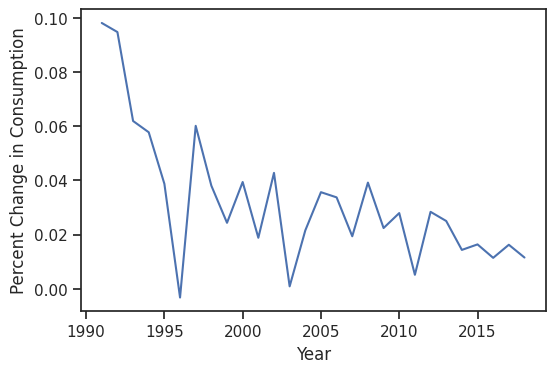

In [78]:
ax = sns.lineplot(data=meat_year_pct, x="TIME", y="Value", palette = 'pastel')
ax.set(xlabel='Year', ylabel='Percent Change in Consumption')

### **Recap**
After visualizing a lot of our data we really have a good sense about the overall trend of the meat industry. Starting with out first line plot, we could really see that meat consumption has steadily been increasing every single year since 1990. However, we can also see the amount by which it is increasing or the percent increase each year is overall in decline. Based on the trend of the data, it is apparent that overall meat consumption *may* start to descrease soon. 

It is also apparent that some countries prefer different types of meat. For example, New Zealand consumes the most Sheep per capita by a long shot but is not a top consumer of any of the other types of meat. It also apparent that most of the muslim majority countries don't consume much pork at all. USA is a top consumer in all types of meat except for Sheep.

We were able to answer the questions that we wanted and more. I definitely struggled the most when it came to figuring out how to format the data in the way I wanted it to be. I knew what I wanted to do but I did not know how to do it. I've certainly learned a ton about Pandas, Seaborn, and the Data Mining process in general. I am eager to continue to learn data mining techniques and continue to grow when it comes to my technical skill. 





### **References**
- https://towardsdatascience.com/the-ultimate-guide-to-data-cleaning-3969843991d4
- https://realpython.com/pandas-python-explore-dataset/
- https://seaborn.pydata.org/api.html
- https://www.w3schools.com/python/pandas/default.asp 
- https://www.kaggle.com/vagifa/meatconsumption